<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [415]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [416]:
# Read CSV
house_csv = pd.read_csv('/Users/damien/Documents/institute_of_data/dat/mod4/Sacramento_transactions.csv')

In [417]:
house_csv.head(50)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


In [418]:
house_csv.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [419]:
house_csv.sample(5)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
569,92 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885920,-121.289908
669,1005 MORENO WAY,SACRAMENTO,95838,CA,3,2,1410,Residential,Fri May 16 00:00:00 EDT 2008,180000,38.646206,-121.442767
267,47 NAPONEE CT,SACRAMENTO,95835,CA,3,2,1531,Residential,Tue May 20 00:00:00 EDT 2008,270000,38.665704,-121.529096
493,3253 ABOTO WAY,RANCHO CORDOVA,95670,CA,4,3,1851,Residential,Mon May 19 00:00:00 EDT 2008,305000,38.577270,-121.285591
335,5840 WALERGA RD,SACRAMENTO,95842,CA,2,1,840,Condo,Mon May 19 00:00:00 EDT 2008,40000,38.673678,-121.357471


There appear to be some missing values in sq_ft.

In [420]:
house_csv.shape

(985, 12)

In [421]:
house_csv.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [422]:
house_csv.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [423]:
house_csv.describe().T

,count,mean,std,min,25%,50%,75%,max
zip,985.0,95750.697462,85.176072,95603.000000,95660.000000,95762.000000,95828.000000,95864.000000
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


In [424]:
house_csv.beds.value_counts().unique

<bound method Series.unique of 3    413
4    258
2    133
0    108
5     59
1     10
6      3
8      1
Name: beds, dtype: int64>

In [425]:
house_csv.baths.value_counts().unique

<bound method Series.unique of 2    544
1    180
3    132
0    108
4     19
5      2
Name: baths, dtype: int64>

<AxesSubplot:>

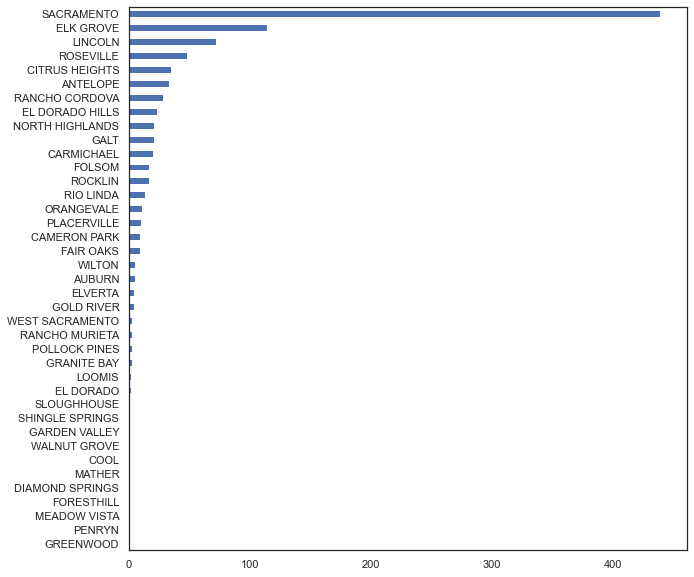

In [426]:
plt.figure(figsize=(10,10))
house_csv.city.value_counts().sort_values().plot(kind = 'barh')

In [427]:
#house_csv['sale_date'] = pd.to_datetime(house_csv.sale_date, 'tzinfos')

#house_csv = house_csv.set_index('sale_date')

house_csv.sample(50)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
736,4240 WINJE DR,ANTELOPE,95843,CA,4,2,2504,Residential,Fri May 16 00:00:00 EDT 2008,246750,38.708840,-121.359559
239,9387 GRANITE FALLS CT,ELK GROVE,95624,CA,3,2,1465,Residential,Tue May 20 00:00:00 EDT 2008,225000,38.419214,-121.348533
476,10372 VIA CINTA CT,ELK GROVE,95757,CA,4,3,2724,Residential,Mon May 19 00:00:00 EDT 2008,274425,38.380089,-121.428186
110,8882 AUTUMN GOLD CT,ELK GROVE,95624,CA,4,2,1993,Residential,Wed May 21 00:00:00 EDT 2008,287417,38.443900,-121.372550
380,7226 LARCHMONT DR,NORTH HIGHLANDS,95660,CA,3,2,1209,Residential,Mon May 19 00:00:00 EDT 2008,130000,38.699269,-121.376334
845,6401 MARSHALL RD,GARDEN VALLEY,95633,CA,3,2,0,Residential,Fri May 16 00:00:00 EDT 2008,490000,38.842550,-120.875400
836,1536 STONEY CROSS LN,LINCOLN,95648,CA,0,0,0,Residential,Fri May 16 00:00:00 EDT 2008,433500,38.860007,-121.310946
616,3104 CLAY ST,SACRAMENTO,95815,CA,2,1,832,Residential,Fri May 16 00:00:00 EDT 2008,96140,38.623910,-121.439208
776,1828 2ND AVE,SACRAMENTO,95818,CA,2,1,1144,Residential,Fri May 16 00:00:00 EDT 2008,299000,38.556844,-121.490769
201,9254 HARROGATE WAY,ELK GROVE,95758,CA,2,2,1006,Residential,Tue May 20 00:00:00 EDT 2008,152000,38.420138,-121.412179


In [428]:
ts = house_csv.price

<AxesSubplot:ylabel='Frequency'>

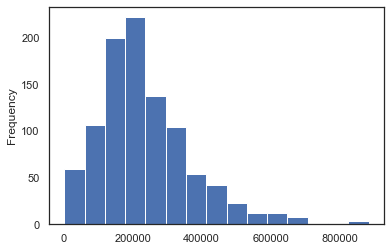

In [429]:
house_csv.price.plot(kind='hist', bins=15)

<AxesSubplot:ylabel='Frequency'>

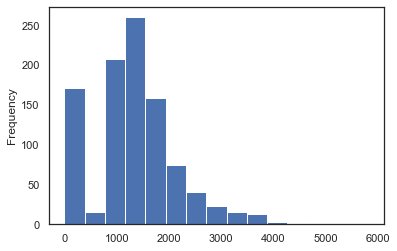

In [430]:
house_csv.sq__ft.plot(kind='hist', bins=15)

<AxesSubplot:ylabel='Frequency'>

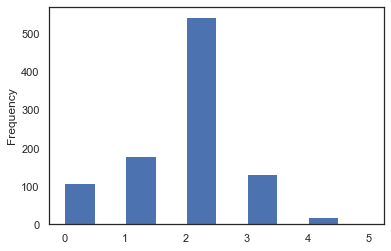

In [431]:
house_csv.baths.plot(kind='hist')

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

### ANSWER

Price is the target variable, because we are trying to estimate it based on predictors (sq_ft etc.)

#### 2.2 List all possible variables which might be Predictor variable.

### ANSWER

Street, city, zip, state, beds, baths, sq_ft, type, sale_date (price might go up over time), latitude and longtitude. All features are possible predictors.

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [432]:
corr = house_csv.corr()
corr

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


<AxesSubplot:>

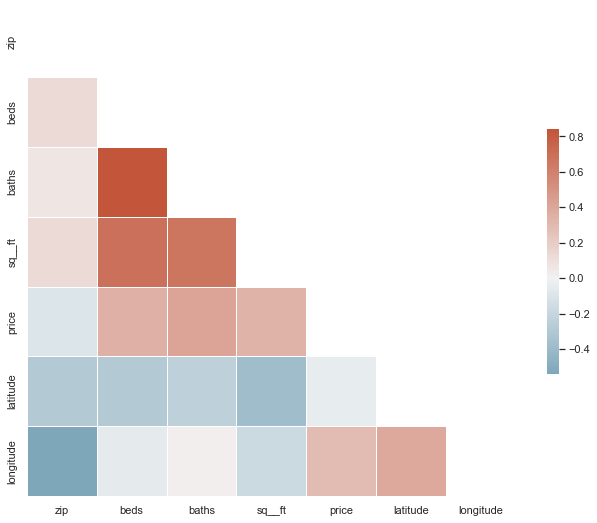

In [433]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


### ANSWER

Baths is the best predictor of price because it has the highest correlation coefficient, followed by beds and sq__ft

<AxesSubplot:xlabel='baths', ylabel='price'>

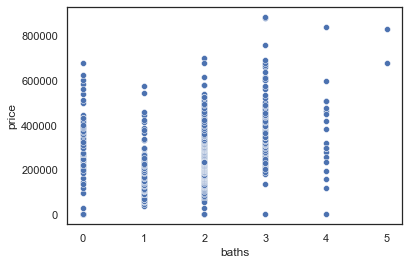

In [434]:
sns.scatterplot(y='price', x='baths', data=house_csv)

<AxesSubplot:xlabel='baths', ylabel='price'>

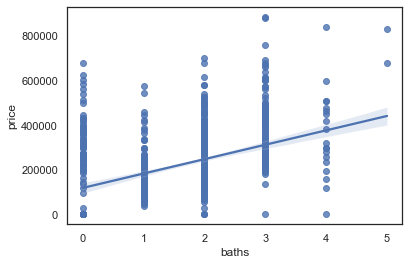

In [435]:
sns.regplot(y='price', x='baths', data=house_csv)

<AxesSubplot:xlabel='sq__ft', ylabel='price'>

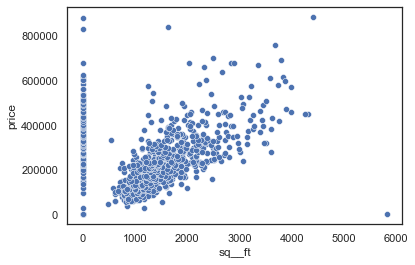

In [436]:
sns.scatterplot(y='price', x='sq__ft', data=house_csv)

<AxesSubplot:xlabel='sq__ft', ylabel='price'>

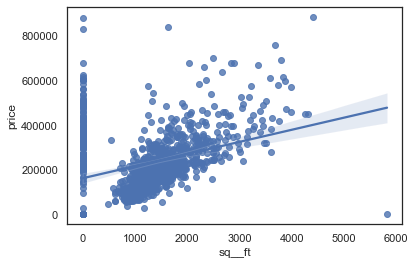

In [437]:
sns.regplot(y='price', x='sq__ft', data=house_csv)

### Finding

Zero values appear to be impacting the fit of sq__ft data, so will try to impute them or drop them.

In [438]:
house_csv[house_csv['sq__ft'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539
966,9197 CORTINA CIR,ROSEVILLE,95678,CA,3,2,0,Condo,Thu May 15 00:00:00 EDT 2008,220000,38.793152,-121.290025
970,3557 SODA WAY,SACRAMENTO,95834,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,224000,38.631026,-121.501879


### Finding

Looks like there is missing data for the three key predictor columns. Will drop rows with zeros in beds, baths, sq__ft.

In [439]:
house_csv['beds'].replace([0], np.NaN, inplace=True)
house_csv['baths'].replace([0], np.NaN, inplace=True)
house_csv['sq__ft'].replace([0], np.NaN, inplace=True)

In [440]:
house_csv.isnull().sum()

street         0
city           0
zip            0
state          0
beds         108
baths        108
sq__ft       171
type           0
sale_date      0
price          0
latitude       0
longitude      0
dtype: int64

In [441]:
house_csv = house_csv.dropna()

In [442]:
house_csv.shape

(814, 12)

In [443]:
house_csv.corr()['price'].sort_values()

zip         -0.219591
latitude     0.058475
longitude    0.278312
beds         0.441988
baths        0.501820
sq__ft       0.693708
price        1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='sq__ft', ylabel='price'>

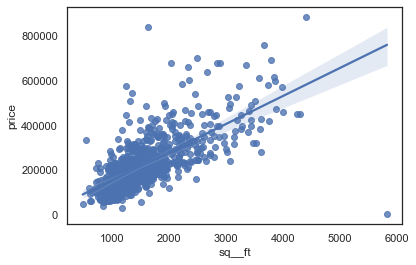

In [444]:
sns.regplot(y='price', x='sq__ft', data=house_csv)

### Finding

Dropping values improved fit of beds, baths and sq__ft, with sq__ft now having the best correlation coefficient

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

# ANSWER

Using simple linear regression with sq__ft as the predictor value

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [445]:
# ANSWER

x_bar = house_csv.sq__ft.mean()
x_rs_list = []

for x in house_csv.sq__ft:
    x_rs = np.absolute(x - x_bar)
    x_rs_list.append(x_rs)
    

y_bar = house_csv.price.mean()
y_rs_list = []

for y in house_csv.price:
    y_rs = np.absolute(y - y_bar)
    y_rs_list.append(y_rs)


x_rs_list = np.asarray(x_rs_list)
y_rs_list = np.asarray(y_rs_list)
x_y_rs = np.multiply(x_rs_list, y_rs_list)


#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable



- X = sq__ft
- Y = price

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [446]:
# ANSWER

b1 = np.sum(y_rs_list * x_rs_list) / np.sum(x_rs_list ** 2)
b1

141.40981673732907

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [447]:
# ANSWER
b0 = y_bar - b1*x_bar
b0

4444.67841588275

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [448]:
# ANSWER

x=4000
y_hat = np.round((b0 + b1*x), 0)

print('A property of', x, 'sq ft is predicted to have a price of: $',y_hat)

A property of 4000 sq ft is predicted to have a price of: $ 570084.0


##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [449]:
# ANSWER
y_rs_list

array([1.70226370e+05, 1.61236370e+05, 1.60568370e+05, 1.60141370e+05,
       1.47548370e+05, 1.39527370e+05, 1.38553370e+05, 1.38446370e+05,
       1.34543370e+05, 1.30511370e+05, 1.29139370e+05, 1.23198370e+05,
       1.22596370e+05, 1.21946370e+05, 1.20698370e+05, 1.18748370e+05,
       1.16185370e+05, 1.13198370e+05, 1.09448370e+05, 1.07818370e+05,
       1.07448370e+05, 1.06766370e+05, 1.06448370e+05, 1.05348370e+05,
       1.04448370e+05, 1.02808370e+05, 1.02167370e+05, 1.00448370e+05,
       9.82483698e+04, 9.74483698e+04, 9.64483698e+04, 9.48933698e+04,
       9.29483698e+04, 9.06983698e+04, 8.84483698e+04, 8.31983698e+04,
       8.21403698e+04, 8.06983698e+04, 7.98553698e+04, 7.94483698e+04,
       7.74483698e+04, 7.54483698e+04, 7.25523698e+04, 6.81983698e+04,
       6.79483698e+04, 6.54483698e+04, 6.44483698e+04, 6.30913698e+04,
       6.30913698e+04, 6.14483698e+04, 5.94483698e+04, 5.64483698e+04,
       5.51983698e+04, 5.51353698e+04, 5.09683698e+04, 5.06883698e+04,
      

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [458]:
# ANSWER

#I can't figure out what I'm doing wrong here, but I know that r2 should fall between 0 and 1

ss_res = np.sum((y_rs_list - y_hat) ** 2)
ss_tot = np.sum(y_rs_list ** 2)
r2 = 1 - (ss_res/ss_tot)

r2

-15.647694819877671

##### 2.7.F [BONUS] Draw Plot of Predicted Line

In [38]:
# ANSWER


##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

In [39]:
# ANSWER

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [40]:
# ANSWER



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



